<a href="https://colab.research.google.com/github/nitishxthakur/DataLab/blob/main/Detection_and_Classification_of_Vehicles_in_Toll_plaza_using_Deep_Learning_Method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Install Kaggle API



In [1]:
!pip install kaggle

Download Vehicle Dataset from Kaggle



In [2]:
!kaggle datasets download -d nadinpethiyagoda/vehicle-dataset-for-yolo

Dataset URL: https://www.kaggle.com/datasets/nadinpethiyagoda/vehicle-dataset-for-yolo
License(s): DbCL-1.0
 97% 364M/375M [00:04<00:00, 82.2MB/s]
100% 375M/375M [00:04<00:00, 79.1MB/s]


In [3]:
from zipfile import ZipFile
dataset = '/content/vehicle-dataset-for-yolo.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


"Dataset File Count and Validation"


In [20]:
import os

# Paths to your dataset
train_images_path = '/content/vehicle dataset/train/images'
val_images_path = '/content/vehicle dataset/valid/images'
# Function to count files
def count_files(folder, extension=None):
    files = os.listdir(folder)
    if extension:
        files = [file for file in files if file.endswith(extension)]
    return len(files)

# Count train and validation data
train_images = count_files(train_images_path, '.jpg')  # Replace with your image extension
train_labels = count_files(train_labels_path, '.txt')
val_images = count_files(val_images_path, '.jpg')      # Replace with your image extension
val_labels = count_files(val_labels_path, '.txt')

# Print dataset details
print(f"Training Images: {train_images}")
print(f"Validation Images: {val_images}")


Training Images: 1435
Validation Images: 649


"Visualize Image with Bounding Boxes from Label Files"


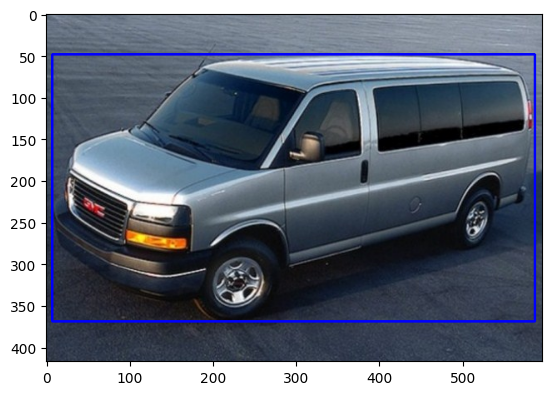

In [4]:
import cv2
import matplotlib.pyplot as plt
import os

# Example to display an image
image_path = '/content/vehicle dataset/train/images/00043_GMC Savana Van 2012.jpg'
label_path = '/content/vehicle dataset/train/labels/00043_GMC Savana Van 2012.txt'

# Display image with bounding boxes
def plot_image_with_boxes(image_path, label_path):
    image = cv2.imread(image_path)
    with open(label_path, 'r') as f:
        for line in f:
            class_id, x_center, y_center, width, height = map(float, line.strip().split())
            h, w = image.shape[:2]
            x_min = int((x_center - width / 2) * w)
            y_min = int((y_center - height / 2) * h)
            x_max = int((x_center + width / 2) * w)
            y_max = int((y_center + height / 2) * h)
            cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (255, 0, 0), 2)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.show()

plot_image_with_boxes(image_path, label_path)


In [5]:
pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 896.3/896.3 kB 20.2 MB/s eta 0:00:00


In [6]:
from ultralytics import YOLO
print(YOLO("yolov8n").info())


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 119MB/s]


YOLOv8n summary: 225 layers, 3,157,200 parameters, 0 gradients, 8.9 GFLOPs
(225, 3157200, 0, 8.8575488)


Create and Save YOLOv8 Dataset YAML Configuration

In [7]:
import yaml

# Path to classes.txt
classes_path = '/content/vehicle dataset/classes.txt'

# Read classes from file
with open(classes_path, 'r') as f:
    classes = [line.strip() for line in f.readlines()]

# Create a YAML configuration
data_yaml = {
    'path': '/content/vehicle dataset',  # Dataset root directory
    'train': '/content/vehicle dataset/train',
    'val': '/content/vehicle dataset/valid',
    'nc': len(classes),  # Number of classes
    'names': classes,    # Class names
}

# Save YAML file
yaml_path = 'dataset.yaml'
with open(yaml_path, 'w') as f:
    yaml.dump(data_yaml, f)

print(f"YAML configuration saved to {yaml_path}")


YAML configuration saved to dataset.yaml


"Generate Dataset YAML and Train YOLOv8 Model"


In [8]:
from ultralytics import YOLO
import yaml

# Step 1: Load class names from classes.txt and generate YAML
classes_path = '/content/vehicle dataset/classes.txt'

# Read classes from file
with open(classes_path, 'r') as f:
    classes = [line.strip() for line in f.readlines()]

# Create a YAML configuration
data_yaml = {
    'path': '/content/dataset.yaml',
    'train': '/content/vehicle dataset/train/images',
    'val': '/content/vehicle dataset/valid/images',
    'nc': len(classes),
    'names': classes,
}

# Save YAML file
yaml_path = 'dataset.yaml'
with open(yaml_path, 'w') as f:
    yaml.dump(data_yaml, f)

print(f"YAML configuration saved to {yaml_path}")

# Step 2: Train the YOLOv8 model
model = YOLO('yolov8n.yaml')  # Replace with 'yolov8s.yaml' for larger models

# Train
model.train(data=yaml_path, epochs=50, imgsz=640, batch=16)


YAML configuration saved to dataset.yaml
Ultralytics 8.3.38 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=dataset.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=Tru

100%|██████████| 755k/755k [00:00<00:00, 22.9MB/s]


Overriding model.yaml nc=80 with nc=6

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 80.7MB/s]


AMP: checks passed ✅


train: Scanning /content/vehicle dataset/train/labels... 2100 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2100/2100 [00:01<00:00, 1495.80it/s]


train: New cache created: /content/vehicle dataset/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.21 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/vehicle dataset/valid/labels... 900 images, 0 backgrounds, 0 corrupt: 100%|██████████| 900/900 [00:01<00:00, 866.52it/s]

val: WARNING ⚠️ /content/vehicle dataset/valid/images/car55.jpg: corrupt JPEG restored and saved


val: New cache created: /content/vehicle dataset/valid/labels.cache
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.26G      3.066      4.212      4.056         12        640: 100%|██████████| 132/132 [00:49<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:10<00:00,  2.89it/s]


                   all        900       1150    0.00314      0.726     0.0118    0.00368

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50       2.2G      2.567      3.711      3.311         12        640: 100%|██████████| 132/132 [00:46<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:10<00:00,  2.69it/s]


                   all        900       1150     0.0562      0.208     0.0393     0.0131

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.21G      2.013      3.279      2.681         10        640: 100%|██████████| 132/132 [00:43<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:10<00:00,  2.89it/s]


                   all        900       1150      0.112      0.368      0.136     0.0614

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.21G      1.745      2.872      2.334         17        640: 100%|██████████| 132/132 [00:47<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:10<00:00,  2.83it/s]


                   all        900       1150      0.326      0.423      0.328      0.182

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.21G      1.569      2.535      2.141         16        640: 100%|██████████| 132/132 [00:48<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:09<00:00,  2.98it/s]


                   all        900       1150      0.394      0.361      0.307      0.181

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.21G      1.456      2.307      2.021         17        640: 100%|██████████| 132/132 [00:46<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:07<00:00,  3.67it/s]


                   all        900       1150      0.464      0.492      0.478      0.312

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50       2.2G      1.368      2.112      1.916         18        640: 100%|██████████| 132/132 [00:45<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:10<00:00,  2.75it/s]

                   all        900       1150      0.492       0.55      0.523      0.341



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.21G      1.296      1.977      1.828         16        640: 100%|██████████| 132/132 [00:48<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:07<00:00,  3.79it/s]

                   all        900       1150      0.616      0.562       0.59      0.404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.23G      1.255      1.862      1.785         11        640: 100%|██████████| 132/132 [00:51<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:10<00:00,  2.81it/s]

                   all        900       1150      0.596      0.609      0.618      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.21G      1.186      1.737      1.718          9        640: 100%|██████████| 132/132 [00:45<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:08<00:00,  3.28it/s]

                   all        900       1150      0.616      0.642      0.632      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.23G       1.16      1.659      1.686         10        640: 100%|██████████| 132/132 [00:47<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:09<00:00,  3.07it/s]


                   all        900       1150      0.681      0.648      0.726      0.519

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50       2.2G      1.113      1.586      1.639         14        640: 100%|██████████| 132/132 [00:53<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:07<00:00,  3.63it/s]

                   all        900       1150      0.785      0.653       0.75      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50       2.2G      1.083      1.507       1.61          8        640: 100%|██████████| 132/132 [00:50<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:10<00:00,  2.80it/s]


                   all        900       1150      0.709      0.649       0.73      0.545

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50       2.2G      1.059      1.471       1.59         10        640: 100%|██████████| 132/132 [00:46<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:09<00:00,  2.92it/s]


                   all        900       1150      0.759      0.682      0.783      0.609

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.23G      1.016      1.415      1.554         12        640: 100%|██████████| 132/132 [00:47<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:07<00:00,  3.84it/s]

                   all        900       1150      0.789      0.698      0.805      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.21G      1.004      1.339       1.53         14        640: 100%|██████████| 132/132 [00:46<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:09<00:00,  2.98it/s]

                   all        900       1150      0.755      0.659      0.776      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.23G      0.998      1.318       1.52         14        640: 100%|██████████| 132/132 [00:46<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:10<00:00,  2.73it/s]

                   all        900       1150      0.807      0.744      0.828      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.21G     0.9864      1.283      1.514         19        640: 100%|██████████| 132/132 [00:48<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:07<00:00,  3.69it/s]


                   all        900       1150      0.752      0.755       0.83      0.655

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50       2.2G     0.9369      1.209      1.476          9        640: 100%|██████████| 132/132 [00:45<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:10<00:00,  2.84it/s]

                   all        900       1150      0.786      0.765      0.838      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50       2.2G     0.9433      1.186      1.468         12        640: 100%|██████████| 132/132 [00:45<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:07<00:00,  3.76it/s]

                   all        900       1150      0.868      0.761      0.865      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.21G     0.9002      1.155       1.44         11        640: 100%|██████████| 132/132 [00:45<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:08<00:00,  3.37it/s]


                   all        900       1150      0.848      0.798      0.878      0.724

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.21G     0.8932      1.148      1.436         12        640: 100%|██████████| 132/132 [00:46<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:10<00:00,  2.80it/s]

                   all        900       1150      0.844      0.774      0.871      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50       2.2G     0.8977      1.118      1.438         16        640: 100%|██████████| 132/132 [00:47<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:07<00:00,  3.90it/s]


                   all        900       1150      0.868      0.779      0.882      0.723

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.21G     0.8681      1.071      1.414         13        640: 100%|██████████| 132/132 [00:46<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:09<00:00,  3.00it/s]


                   all        900       1150      0.865      0.795      0.879      0.717

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.22G     0.8542       1.08      1.408         11        640: 100%|██████████| 132/132 [00:44<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:09<00:00,  2.96it/s]

                   all        900       1150      0.897      0.808      0.907      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.21G       0.84      1.046      1.392         12        640: 100%|██████████| 132/132 [00:48<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:07<00:00,  3.87it/s]

                   all        900       1150      0.889      0.796      0.901      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.21G     0.8295      1.018      1.379         10        640: 100%|██████████| 132/132 [00:48<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:10<00:00,  2.81it/s]

                   all        900       1150      0.799      0.811      0.866      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50       2.2G     0.8256      1.023       1.37         10        640: 100%|██████████| 132/132 [00:46<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:07<00:00,  3.88it/s]

                   all        900       1150       0.91      0.827      0.917      0.766



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50       2.2G     0.8169     0.9828      1.374          8        640: 100%|██████████| 132/132 [00:46<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:09<00:00,  3.02it/s]


                   all        900       1150      0.898      0.817       0.91      0.764

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50       2.2G     0.7952     0.9551      1.357         16        640: 100%|██████████| 132/132 [00:43<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:09<00:00,  2.92it/s]

                   all        900       1150      0.907      0.825      0.919      0.765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50       2.2G      0.787     0.9448      1.342         15        640: 100%|██████████| 132/132 [00:49<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:07<00:00,  3.95it/s]

                   all        900       1150       0.91      0.834      0.921      0.774



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50       2.2G     0.7853     0.9323      1.342         13        640: 100%|██████████| 132/132 [00:49<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:08<00:00,  3.22it/s]

                   all        900       1150      0.905      0.823      0.914      0.764



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.22G     0.7728     0.9265       1.33         11        640: 100%|██████████| 132/132 [00:43<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:09<00:00,  2.90it/s]

                   all        900       1150      0.888      0.846      0.924      0.788



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50       2.2G     0.7608     0.9073      1.321         12        640: 100%|██████████| 132/132 [00:46<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:07<00:00,  3.82it/s]

                   all        900       1150      0.914      0.841      0.931      0.792



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50       2.2G     0.7359     0.8921      1.301          8        640: 100%|██████████| 132/132 [00:48<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:09<00:00,  2.93it/s]

                   all        900       1150      0.902       0.83      0.922      0.775



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.21G     0.7391     0.8622      1.305         11        640: 100%|██████████| 132/132 [00:44<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:11<00:00,  2.46it/s]

                   all        900       1150      0.911      0.857      0.935      0.798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.21G     0.7395     0.8637      1.304         11        640: 100%|██████████| 132/132 [00:45<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:09<00:00,  3.02it/s]

                   all        900       1150      0.904      0.866      0.929      0.799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50       2.2G     0.7242     0.8611      1.296         13        640: 100%|██████████| 132/132 [00:43<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:09<00:00,  3.01it/s]

                   all        900       1150       0.92      0.844      0.931      0.792



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50       2.2G      0.722     0.8341      1.292         12        640: 100%|██████████| 132/132 [00:45<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:07<00:00,  3.89it/s]

                   all        900       1150      0.896      0.881      0.934      0.798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.21G     0.7151     0.8358       1.29         13        640: 100%|██████████| 132/132 [00:46<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:09<00:00,  2.95it/s]


                   all        900       1150      0.916      0.847      0.934      0.802
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.21G     0.5881     0.6138       1.17          4        640: 100%|██████████| 132/132 [00:46<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:10<00:00,  2.86it/s]

                   all        900       1150       0.93       0.87      0.942      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.19G     0.5605     0.5823      1.143          7        640: 100%|██████████| 132/132 [00:44<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:07<00:00,  3.78it/s]

                   all        900       1150      0.919      0.862      0.934      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.19G     0.5427     0.5525      1.132          7        640: 100%|██████████| 132/132 [00:46<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:07<00:00,  4.01it/s]

                   all        900       1150      0.918      0.875      0.938      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.21G     0.5338     0.5386      1.123          4        640: 100%|██████████| 132/132 [00:48<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:10<00:00,  2.77it/s]

                   all        900       1150      0.919      0.891      0.947      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.19G     0.5211     0.5265      1.106         11        640: 100%|██████████| 132/132 [00:43<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:09<00:00,  2.96it/s]

                   all        900       1150      0.932      0.884      0.945      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.21G     0.5052     0.5074      1.103          4        640: 100%|██████████| 132/132 [00:46<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:08<00:00,  3.44it/s]

                   all        900       1150      0.939      0.875      0.946      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.21G     0.5086     0.4849      1.096          4        640: 100%|██████████| 132/132 [00:45<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:07<00:00,  3.97it/s]

                   all        900       1150      0.928      0.892      0.948      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.19G     0.4913     0.4809      1.084          4        640: 100%|██████████| 132/132 [00:44<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:09<00:00,  3.13it/s]


                   all        900       1150      0.936      0.887       0.95       0.83

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.19G     0.4837     0.4745       1.08          4        640: 100%|██████████| 132/132 [00:45<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:09<00:00,  2.94it/s]

                   all        900       1150      0.952      0.878      0.949       0.83



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50       2.2G     0.4774     0.4596      1.066          7        640: 100%|██████████| 132/132 [00:44<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:10<00:00,  2.80it/s]


                   all        900       1150      0.947      0.886      0.952      0.834

50 epochs completed in 0.792 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
WARNING ⚠️ validating an untrained model YAML will result in 0 mAP.
Ultralytics 8.3.38 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3,006,818 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:09<00:00,  3.02it/s]


                   all        900       1150      0.948      0.886      0.952      0.834
                   car        182        201      0.947      0.881       0.94      0.891
            threewheel        167        227      0.954      0.899      0.966       0.84
                   bus        162        185      0.977      0.924      0.982      0.905
                 truck        123        151      0.913      0.921      0.959      0.813
             motorbike        165        216      0.935      0.795      0.908      0.636
                   van        157        170      0.959      0.894      0.957      0.919
Speed: 0.2ms preprocess, 2.0ms inference, 0.0ms loss, 2.2ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e7490f826e0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
     

"Evaluate YOLOv8 Model and Display Metrics"


In [9]:
metrics = model.val()
print(metrics)  # Outputs precision, recall, mAP, and other metrics


WARNING ⚠️ validating an untrained model YAML will result in 0 mAP.
Ultralytics 8.3.38 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3,006,818 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/vehicle dataset/valid/labels.cache... 900 images, 0 backgrounds, 0 corrupt: 100%|██████████| 900/900 [00:00<?, ?it/s]

val: WARNING ⚠️ /content/vehicle dataset/valid/images/car55.jpg: corrupt JPEG restored and saved



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 57/57 [00:12<00:00,  4.39it/s]


                   all        900       1150      0.951      0.885      0.952      0.833
                   car        182        201      0.953      0.876      0.939       0.89
            threewheel        167        227      0.956      0.899      0.967       0.84
                   bus        162        185      0.977      0.923       0.98      0.902
                 truck        123        151      0.922      0.921      0.958      0.811
             motorbike        165        216      0.935      0.796      0.909      0.635
                   van        157        170      0.962      0.894      0.957       0.92
Speed: 0.3ms preprocess, 4.6ms inference, 0.0ms loss, 1.9ms postprocess per image
Results saved to runs/detect/train2
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e7492297a00>
curves: ['Precision-Rec

In [10]:
# Test on an image
results = model.predict(source='/content/vehicle dataset/valid/images/00826.jpg', save=True, imgsz=640)




image 1/1 /content/vehicle dataset/valid/images/00826.jpg: 448x640 1 car, 55.4ms
Speed: 5.4ms preprocess, 55.4ms inference, 2.0ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/train3



0: 384x640 1 car, 1 truck, 10.4ms
Speed: 2.7ms preprocess, 10.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


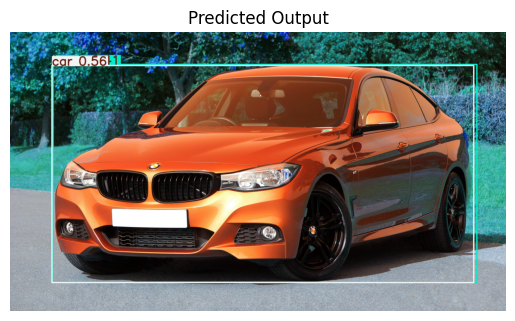

In [17]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
from PIL import Image

# Load the model
model = YOLO('yolov8n.pt')  # Or 'yolov8s.pt', etc., depending on your trained model

# Path to the local image
image_path = '/content/car_image2.jpg'

# Load the image from the local file system
image = Image.open(image_path)

# Perform prediction
results = model.predict(source=image, imgsz=640)

# Visualize the output
predicted_image = results[0].plot()  # Get the first result and plot it
plt.imshow(predicted_image)
plt.axis('off')
plt.title("Predicted Output")
plt.show()
